### REITS index 复现
注：REITs行业index计算-直接使close_df, total_shares_df, free_flow_shares_df为该行业reit的数据即可

In [1]:
import pandas as pd
close_df = pd.read_csv('D:\\REITS研究数据\\close_price.csv')
total_shares_df = pd.read_csv('D:\\REITS研究数据\\total_shares.csv')
free_flow_shares_df = pd.read_csv('D:\\REITS研究数据\\free_flow_shares.csv')

close_df['time'] = pd.to_datetime(close_df['time'])
total_shares_df['time'] = pd.to_datetime(total_shares_df['time'])
free_flow_shares_df['time'] = pd.to_datetime(free_flow_shares_df['time'])

In [2]:
shares_chg = total_shares_df.iloc[:,1:].diff()
#shares_chg = free_flow_shares_df.iloc[:,1:].diff()
shares_chg_pct = shares_chg/total_shares_df.iloc[:,1:].shift(1)

#### 查看股份变动数据，发现都是扩募造成的，扩募时变化均超过5%，其余变化不超过5%，因此只要每次扩募之前都调整除数即可

In [3]:
shares_chg = shares_chg.fillna(0)
shares_chg_pct.loc[((shares_chg!=0).sum(axis=1))!=0,((shares_chg!=0).sum(axis=0))!=0]

,508000.SH,508056.SH,180101.SZ,180301.SZ
479,9.206522e-01,2.921791e-01,0.000000,0.000000
483,0.000000e+00,0.000000e+00,0.579034,0.192037
485,-2.186757e-08,8.254790e-09,0.000000,0.000000
492,2.186757e-08,0.000000e+00,0.000000,0.000000
493,-2.186757e-08,0.000000e+00,0.000000,0.000000


In [4]:
#total_shares_df.loc[((shares_chg!=0).sum(axis=1))!=0,['time','508000.SH','508056.SH','180101.SZ','180301.SZ']]

In [5]:
#有变化的reits
share_chg_reits = list(shares_chg_pct.loc[((shares_chg!=0).sum(axis=1))!=0,((shares_chg!=0).sum(axis=0))!=0].columns)

In [6]:
#调整变化比例
def get_adj_shares_chg_pct(a):
    if a <= 0.05:
        return 0
    return a
adj_shares_chg_pct = shares_chg_pct.copy(deep=True)
adj_shares_chg_pct.loc[((shares_chg!=0).sum(axis=1))!=0,((shares_chg!=0).sum(axis=0))!=0] = shares_chg_pct.loc[((shares_chg!=0).sum(axis=1))!=0,((shares_chg!=0).sum(axis=0))!=0].applymap(get_adj_shares_chg_pct)

In [7]:
adj_shares_pct = adj_shares_chg_pct + 1
adj_shares_pct = adj_shares_pct.cumprod()

In [8]:
adj_shares_pct

,508000.SH,508001.SH,508006.SH,508008.SH,508009.SH,508018.SH,508019.SH,508021.SH,508027.SH,508028.SH,...,508099.SH,180101.SZ,180102.SZ,180103.SZ,180201.SZ,180202.SZ,180301.SZ,180401.SZ,180501.SZ,180801.SZ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,1.000000,NaN,NaN,1.0,NaN,1.000000,NaN,NaN,1.0
2,1.000000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,1.000000,NaN,NaN,1.0,NaN,1.000000,NaN,NaN,1.0
3,1.000000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,1.000000,NaN,NaN,1.0,NaN,1.000000,NaN,NaN,1.0
4,1.000000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,1.000000,NaN,NaN,1.0,NaN,1.000000,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1.920652,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.579034,1.0,1.0,1.0,1.0,1.192037,1.0,1.0,1.0
503,1.920652,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.579034,1.0,1.0,1.0,1.0,1.192037,1.0,1.0,1.0
504,1.920652,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.579034,1.0,1.0,1.0,1.0,1.192037,1.0,1.0,1.0
505,1.920652,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.579034,1.0,1.0,1.0,1.0,1.192037,1.0,1.0,1.0


In [9]:
adj_total_shares = total_shares_df.copy(deep=True)

for col in total_shares_df.columns[1:]:
    base = total_shares_df.loc[total_shares_df[col].first_valid_index(),col]
    adj_total_shares[col] = base*adj_shares_pct[col]

adj_total_shares.iloc[0,:] = total_shares_df.iloc[0,:]

In [10]:
adj_shares_ratio_df = adj_total_shares.copy(deep=True)
adj_shares_ratio_df.iloc[:,1:] = free_flow_shares_df.iloc[:,1:].div(adj_total_shares.iloc[:,1:],axis=0)

In [11]:
# 靠边算法
import math
import numpy as np
def get_end(a):
    if np.isnan(a):
        return np.nan
    if a<=0.15:
        return math.ceil(a*100)/100
    if a>0.15 and a<=0.20:
        return 0.20
    if a>0.20 and a<=0.30:
        return 0.30
    if a>0.30 and a<=0.40:
        return 0.40
    if a>0.40 and a<=0.50:
        return 0.50
    if a>0.50 and a<=0.60:
        return 0.60
    if a>0.60 and a<=0.70:
        return 0.70
    if a>0.70 and a<=0.80:
        return 0.80
    if a>0.80:
        return 1
    
adj_shares_ratio_df.iloc[:,1:] = adj_shares_ratio_df.iloc[:,1:].applymap(get_end)

In [12]:
adj_shares_df = adj_shares_ratio_df.copy(deep=True)
adj_shares_df.iloc[:,1:] = adj_total_shares.iloc[:,1:]*adj_shares_ratio_df.iloc[:,1:]

In [13]:
adj_shares_ratio_df

,time,508000.SH,508001.SH,508006.SH,508008.SH,508009.SH,508018.SH,508019.SH,508021.SH,508027.SH,...,508099.SH,180101.SZ,180102.SZ,180103.SZ,180201.SZ,180202.SZ,180301.SZ,180401.SZ,180501.SZ,180801.SZ
0,2021-06-21,0.5,0.3,0.3,NaN,NaN,NaN,NaN,NaN,0.4,...,NaN,0.4,NaN,NaN,0.3,NaN,0.4,NaN,NaN,0.4
1,2021-06-22,0.5,0.3,0.3,NaN,NaN,NaN,NaN,NaN,0.4,...,NaN,0.4,NaN,NaN,0.3,NaN,0.4,NaN,NaN,0.4
2,2021-06-23,0.5,0.3,0.3,NaN,NaN,NaN,NaN,NaN,0.4,...,NaN,0.4,NaN,NaN,0.3,NaN,0.4,NaN,NaN,0.4
3,2021-06-24,0.5,0.3,0.3,NaN,NaN,NaN,NaN,NaN,0.4,...,NaN,0.4,NaN,NaN,0.3,NaN,0.4,NaN,NaN,0.4
4,2021-06-25,0.5,0.3,0.3,NaN,NaN,NaN,NaN,NaN,0.4,...,NaN,0.4,NaN,NaN,0.3,NaN,0.4,NaN,NaN,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,2023-07-14,0.5,0.5,0.5,0.3,0.2,0.8,0.4,0.5,0.6,...,0.7,0.5,0.4,0.4,0.5,0.7,0.7,0.3,0.4,0.6
503,2023-07-17,0.5,0.5,0.5,0.3,0.2,0.8,0.4,0.5,0.6,...,0.7,0.5,0.4,0.4,0.5,0.7,0.7,0.3,0.4,0.6
504,2023-07-18,0.5,0.5,0.5,0.3,0.2,0.8,0.4,0.5,0.6,...,0.7,0.5,0.4,0.4,0.5,0.7,0.7,0.3,0.4,0.6
505,2023-07-19,0.5,0.5,0.5,0.3,0.2,0.8,0.4,0.5,0.6,...,0.7,0.5,0.4,0.4,0.5,0.7,0.7,0.3,0.4,0.6


In [14]:
def get_year_quarter(a):
    return str(a.year)+'_'+str(math.ceil(float(a.month)/3))

adj_shares_df['y_q'] = adj_shares_df['time'].apply(get_year_quarter)

In [15]:
adj_shares_chg_pct_temp = adj_shares_chg_pct.fillna(0)
adj_date_ind = list(total_shares_df.loc[((adj_shares_chg_pct_temp!=0).sum(axis=1))!=0,'time'].index-1)
adj_date_ind

[478, 482]

In [16]:
def get_nan(a):
    return np.isnan(a)
for quarter in adj_shares_df['y_q'].unique():
    q_df = adj_shares_df.loc[adj_shares_df['y_q']==quarter]
    adj_date_ind = adj_date_ind + [int(q_df.index[0])-1]
    nan_col = q_df.iloc[0,1:-1].apply(get_nan)
    nan_col = list(nan_col[nan_col==True].index)
    adj_shares_df.loc[adj_shares_df['y_q']==quarter,nan_col] = np.nan

In [17]:
adj_date_ind = list(set(adj_date_ind))
adj_date_ind.sort()

In [18]:
adj_date_ind

[-1, 7, 71, 132, 190, 249, 314, 374, 433, 478, 482, 492]

In [19]:
# 调整权重function
def get_w_adj(y):
    x = y.copy(deep=True)
    xt = x.T
    if xt.max() <= 0.15:
        return x
    xt_ivld = xt.index[xt > 0.15]
    xt[xt_ivld] = 0.15
    ivld_w_sum = xt[xt_ivld].sum()
    xt[~xt.index.isin(xt_ivld)] = (xt[~xt.index.isin(xt_ivld)].div(xt[~xt.index.isin(xt_ivld)].sum()))*(1-ivld_w_sum)
    return get_w_adj(xt.T)

# weight_org = adj_cap_df.iloc[:,1:].div(adj_cap_df.iloc[:,1:].sum(axis=1),axis=0)
# weight = weight_org.copy(deep=True)
# weight_ivld = weight.index[weight.apply(max, axis=1) > 0.15]
# for i in weight_ivld:
#     weight.iloc[i,:] = get_w_adj(weight.iloc[i,:])

In [20]:
divisor_df = pd.DataFrame(index = list(adj_shares_df.index))
divisor_df['divisor'] = np.nan
weight_factor_df = pd.DataFrame(index = list(adj_shares_df.index), columns = list(adj_shares_df.columns[1:-1]))
weight_factor_df.loc[:,:] = 1

import sys
sys.setrecursionlimit(20000)
for i in range(len(adj_date_ind)):
    ind = adj_date_ind[i]
    if ind == -1:
        ind_next = adj_date_ind[i+1]
        adj_shares_df.iloc[(ind+1):(ind_next+1),1:-1] = adj_shares_df.iloc[(ind+1),1:-1]
        #weight adj
        total_cap = (adj_shares_df.iloc[ind+1,1:-1]*close_df.iloc[ind+1,1:]).sum()
        if len(adj_shares_df.iloc[ind+1,1:-1].dropna()) < 10:
            divisor_df.iloc[(ind+1):(ind_next+1),:] = (adj_shares_df.iloc[ind+1,1:-1]*close_df.iloc[ind+1,1:]).sum()
        else:
            weight_org = (adj_shares_df.iloc[ind+1,1:-1]*close_df.iloc[ind+1,1:])/total_cap
            weight = weight_org.copy(deep=True)
            weight = get_w_adj(weight)
            weight_factor = weight/weight_org
            weight_factor_df.iloc[(ind+1):(ind_next+1),:] = weight_factor
            #divisor cal
            divisor_df.iloc[(ind+1):(ind_next+1),:] = (adj_shares_df.iloc[ind+1,1:-1]*close_df.iloc[ind+1,1:]*weight_factor_df.iloc[ind+1,:]).sum()
        
    elif i != len(adj_date_ind)-1:
        ind_next = adj_date_ind[i+1]
        adj_shares_df.iloc[(ind+1):(ind_next+1),1:-1] = adj_shares_df.iloc[(ind+1),1:-1]
        if len(adj_shares_df.iloc[ind+1,1:-1].dropna()) < 10:
            org_cap = (adj_shares_df.iloc[ind,1:-1]*close_df.iloc[ind,1:]).sum()
            new_cap = (adj_shares_df.iloc[ind+1,1:-1]*close_df.iloc[ind,1:]).sum()
            org_divisor = divisor_df.iloc[ind,:]
            divisor_df.iloc[(ind+1):(ind_next+1),:] = org_divisor*new_cap/org_cap
        else:
            #weight adj
            total_cap = (adj_shares_df.iloc[ind+1,1:-1]*close_df.iloc[ind,1:]).sum()
            weight_org = (adj_shares_df.iloc[ind+1,1:-1]*close_df.iloc[ind,1:])/total_cap
            weight = weight_org.copy(deep=True)
            weight = get_w_adj(weight)
            weight_factor = weight/weight_org
            weight_factor_df.iloc[(ind+1):(ind_next+1),:] = weight_factor
            #divisor cal
            org_cap = (adj_shares_df.iloc[ind,1:-1]*close_df.iloc[ind,1:]*weight_factor_df.iloc[ind,:]).sum()
            new_cap = (adj_shares_df.iloc[ind+1,1:-1]*close_df.iloc[ind,1:]*weight_factor_df.iloc[ind+1,:]).sum()
            org_divisor = divisor_df.iloc[ind,:]
            divisor_df.iloc[(ind+1):(ind_next+1),:] = org_divisor*new_cap/org_cap
        
    else:
        adj_shares_df.iloc[(ind+1):,1:-1] = adj_shares_df.iloc[(ind+1),1:-1]
        if len(adj_shares_df.iloc[ind+1,1:-1].dropna()) < 10:
            org_cap = (adj_shares_df.iloc[ind,1:-1]*close_df.iloc[ind,1:]).sum()
            new_cap = (adj_shares_df.iloc[ind+1,1:-1]*close_df.iloc[ind,1:]).sum()
            org_divisor = divisor_df.iloc[ind,:]
            divisor_df.iloc[(ind+1):,:] = org_divisor*new_cap/org_cap
        else:
            #weight adj
            total_cap = (adj_shares_df.iloc[ind+1,1:-1]*close_df.iloc[ind,1:]).sum()
            weight_org = (adj_shares_df.iloc[ind+1,1:-1]*close_df.iloc[ind,1:])/total_cap
            weight = weight_org.copy(deep=True)
            weight = get_w_adj(weight)
            weight_factor = weight/weight_org
            weight_factor_df.iloc[(ind+1):,:] = weight_factor
            #divisor cal
            org_cap = (adj_shares_df.iloc[ind,1:-1]*close_df.iloc[ind,1:]*weight_factor_df.iloc[ind,:]).sum()
            new_cap = (adj_shares_df.iloc[ind+1,1:-1]*close_df.iloc[ind,1:]*weight_factor_df.iloc[ind+1,:]).sum()
            org_divisor = divisor_df.iloc[ind,:]
            divisor_df.iloc[(ind+1):,:] = org_divisor*new_cap/org_cap

In [21]:
adj_cap_df = adj_shares_df.iloc[:,:-1].copy(deep=True)
adj_cap_df.iloc[:,1:] = adj_shares_df.iloc[:,1:-1]*close_df.iloc[:,1:]

In [22]:
index_value = (pd.DataFrame((adj_cap_df.iloc[:,1:]*weight_factor_df).sum(axis=1)).div(divisor_df['divisor'],axis=0))*1000
index_value

,0
0,1000.000000
1,982.960655
2,977.295427
3,974.703867
4,976.809680
...,...
502,906.298237
503,928.472106
504,953.291396
505,945.631030


In [23]:
index_value = pd.DataFrame(index_value)

In [24]:
index_value.columns = ['value']

In [25]:
index_value['time'] = close_df['time']

In [26]:
index_value = index_value[['time','value']]

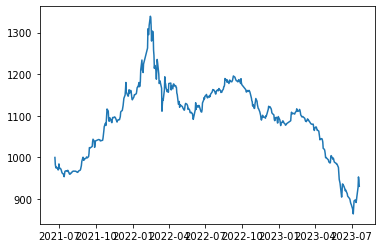

In [27]:
import matplotlib.pyplot as plt
plt.plot(index_value['time'],index_value['value'])

In [71]:
index_value.to_csv('D:\\REITS研究数据\\reits_index_wadj.csv')

### reits-index 基差 & 加速度

In [28]:
import pandas as pd
index_value = pd.read_csv('D:\\REITS研究数据\\reits_index_wadj.csv',index_col=[0])

In [29]:
index_value

,time,value
0,2021-06-21,1000.000000
1,2021-06-22,981.129051
2,2021-06-23,974.425507
3,2021-06-24,972.171948
4,2021-06-25,973.664665
...,...,...
502,2023-07-14,919.720504
503,2023-07-17,942.222769
504,2023-07-18,967.409632
505,2023-07-19,959.635816


In [225]:
close_df = pd.read_csv('D:\\REITS研究数据\\close_price.csv')
close_df['time'] = pd.to_datetime(close_df['time'])

In [226]:
close_norm_df = close_df.copy(deep=True)
base_price = pd.DataFrame(index=[0],columns=close_norm_df.columns[1:])
for col in close_norm_df.columns[1:]:
    base_price.loc[:,col] = close_norm_df.iloc[close_norm_df[col].first_valid_index()][col]
close_norm_df.iloc[:,1:] = close_norm_df.iloc[:,1:].div(list(base_price.iloc[0]),axis=1)

In [227]:
diff_df = close_norm_df.copy(deep=True)
diff_df.iloc[:,1:] = close_norm_df.iloc[:,1:].subtract(list(index_value['value'].T/1000),axis='rows')

In [228]:
def get_scnd_der(x):
    x = x.values
    return (x[2]-x[1])-(x[1]-x[0])
scnd_der_df = diff_df.copy(deep=True)
scnd_der_df.iloc[:,1:] = diff_df.iloc[:,1:].rolling(3).apply(get_scnd_der)

In [124]:
diff_df.to_csv('D:\\REITS研究数据\\基差.csv')
scnd_der_df.to_csv('D:\\REITS研究数据\\加速度.csv')